# Plotter demo

To save the plots in a global result folder change the notebook settings of vs code: <br>
File -> Preferences -> Settings -> Extensions -> Jupyter -> Notebook File root : ${workspaceFolder}

### Simple plot

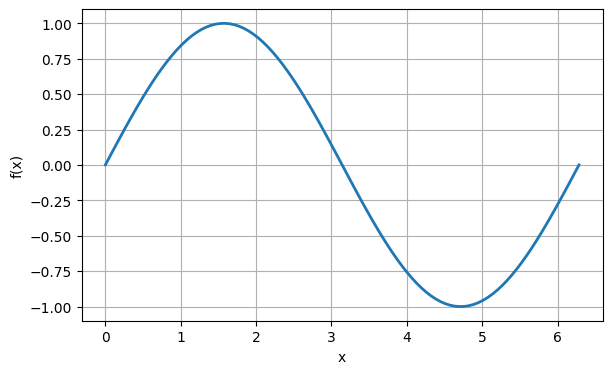

In [12]:
from sky.plotlib import LinePlot, Plotter
import numpy as np

# Plot
x = np.linspace(0.0, 2*np.pi, 100)
y = np.sin(x)
plt1 = LinePlot(x,y)

# Create plotter
plotter = Plotter()
_ = plotter.plot(plt1)


### Save plot to result folder

Check out the result folder and run the file ...Example_plot.py to recreate the plot.

In [ ]:
from sky.plotlib import LinePlot, Plotter
from sky.filemanager import create_result_folder

# Setup
tag = "Example_plot"
result_folder = create_result_folder(tag = tag, max_res_folders = 7, max_daily_folders= 7)

# Create plot object
# Plot
x = np.linspace(0.0, 2*np.pi, 100)
y = np.sin(x)
plt1 = LinePlot(x,y, label = "First plot")

# Create plotter
plotter = Plotter(save_path = result_folder, open_saved_plot=False)
_ = plotter.plot(plt1, filename = f'{tag}')


### Plot a 1 x 3 subplot

In [ ]:
# Create 2 addiational plot objects

T2 = np.pi
x = np.linspace(0.0, 2*np.pi, 100)
y2 = 5.0 * np.sin(2 * np.pi * 1/T2 * x)

T3 = 3*np.pi
x = np.linspace(0.0, 2*np.pi, 100)
y3 = 5.0 * np.sin(2 * np.pi * 1/T3 * x)

plt2 = LinePlot(x,y2, x_label = "x", y_label = "Model", label = "plot 2")
plt3 = LinePlot(x,y3, x_label = "x", y_label = "Model", label = "plot 3")

_ = plotter.plot(plt1,plt2,plt3, filename = f'{tag}_plot1')

### Plot all plots in one plot

In [ ]:
_ = plotter.plot([plt1,plt2,plt3], filename = f'{tag}_plot1')

### Plot in different plot style

In [ ]:
paper_plotter = Plotter(save_path = result_folder, open_saved_plot=False, stylesheet= r"run\public\user_input_files\paper.mplstyle")

_ = paper_plotter.plot([plt1,plt2,plt3], filename = f'{tag}_plot1', fig_size = np.array([10, 7]))

### Plot multi columne subplots

Bug note: the empty plots only appear when used with Jupyter notebooks

In [ ]:
from sky.plotlib import get_multcolumn_subplot

fig, ax = get_multcolumn_subplot(n_regular_plots = 2, n_multi_colm = 1, regular_plot_grid= [1,2])

_ = paper_plotter.plot(plt1,plt2,plt3, filename = f'{tag}_plot1', custom_fig= [fig, ax])


### Plot with shared y axis 

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

_ = paper_plotter.plot(plt1,plt2, filename = f'{tag}_plot1', custom_fig= [fig, np.array([ax1, ax2])])